In [9]:
# from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import cv2
from keras import layers
from tensorflow import keras
import tensorflow as tf
# from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import fetch_openml

from utils import *

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
by_merge_map = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'A', 11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J', 20:'K', 21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T', 30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z', 36:'a', 37:'b', 38:'d', 39:'e', 40:'f', 41:'g', 42:'h', 43:'n', 44:'q', 45:'r', 46:'t'}
by_merge_map_new = {}
poplist = []

for k in by_merge_map.keys():
    if k >= 10 and k <= 35:
        by_merge_map_new[k-10] = by_merge_map[k]

In [11]:
m2 = keras.models.load_model('./model/emnist_save.json')

In [12]:
def convert_picture(path):
    img = cv2.imread(path)
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    inverted = 255 - grey
    img = cv2.resize(inverted, (28, 28  ))
    # _,img = cv2.threshold(img, 40,255, cv2.THRESH_BINARY)
    # img = img.astype('bool')
    return img

In [13]:
from glob import glob
from pathlib import Path
paths = glob('../data/Paint/*.png')
paths

['../data/Paint\\A.png', '../data/Paint\\B.png']

'G'

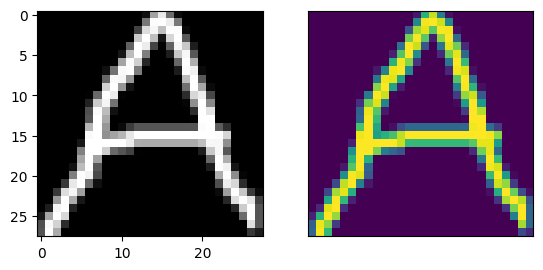

In [36]:
from PIL import Image

pic =cv2.imread(paths[0])
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
pic = 255 - pic

pic = fix_image(pic)
plt.imshow(np.asarray(pic, dtype='int'))



by_merge_map_new[np.argmax(m2.predict(np.reshape(pic, (1, 28, 28)), verbose=0))]




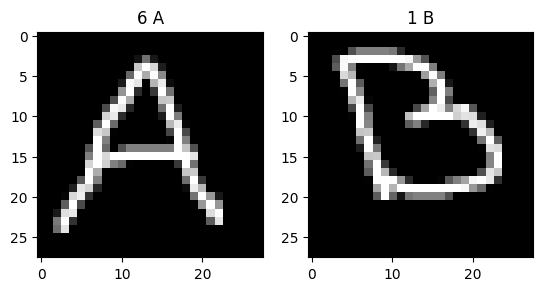

In [15]:
for i,p in enumerate(paths):
    plt.subplot(1,len(paths),i+1)
    
    pic = convert_picture(p)
    
    y_pred = m2.predict(np.reshape(pic, (1, 28, 28)), verbose=0)
    plt.title(f'{np.argmax(y_pred[0])} {Path(p).stem}')

    plt.imshow(pic, cmap='gray')